In [ ]:
!cd dionysus_vineyards/ && python setup.py build_ext && find build/ -name "*.so" -exec mv {} ../ \; && rm -r build

In [ ]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [38]:
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt

from multipers import *

# Two modules with the same rank invariant

Simplicial complex 1.

In [39]:
#  0 --- 3 / 2
#        |
#        |
#        1

In [40]:
simplextree = gd.SimplexTree()
simplextree.insert([0,3])
simplextree.insert([1,3])
simplextree.insert([2])
F1 = np.array([0,1,1,1])
F2 = np.array([1,0,1,1])
filters = np.hstack([F1[:,np.newaxis], F2[:,np.newaxis]])

Show decomposition.

<IPython.core.display.Javascript object>


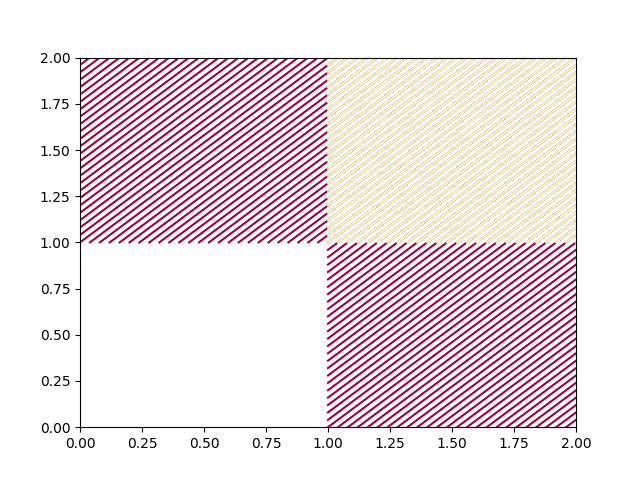

In [41]:
D, A, B, _ = sublevelsets_multipersistence(
    "vineyards", simplextree, filters, homology=0, num_lines=100, essential=True, 
    bnds_filt=[0,2,0,2], epsilon=1e-10, visu=True, plot_per_bar=False, bnds_visu=None)

In [42]:
delta = np.abs(A[0,0] - A[1,0]) if A[0,0] != A[1,0] else np.abs(A[2,2] - A[1,2])
I = multipersistence_image(D, np.array(B), resolution=[200,200], bandwidth=.1, power=0.)
L = multipersistence_landscape(D, B, delta, resolution=[200,200], k=3)

Show Multiparameter Persistence Image.

<IPython.core.display.Javascript object>


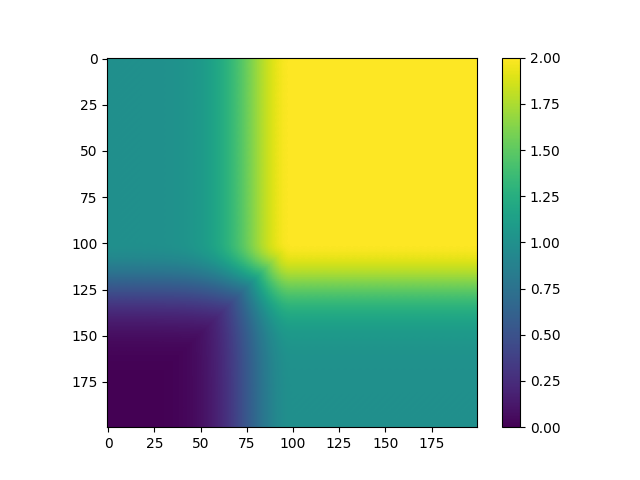

In [43]:
plt.figure()
plt.imshow(np.flip(I, 0), vmin=0., vmax=2.)
plt.colorbar()
plt.show()

Show Multiparameter Persistence Landscape.

<IPython.core.display.Javascript object>


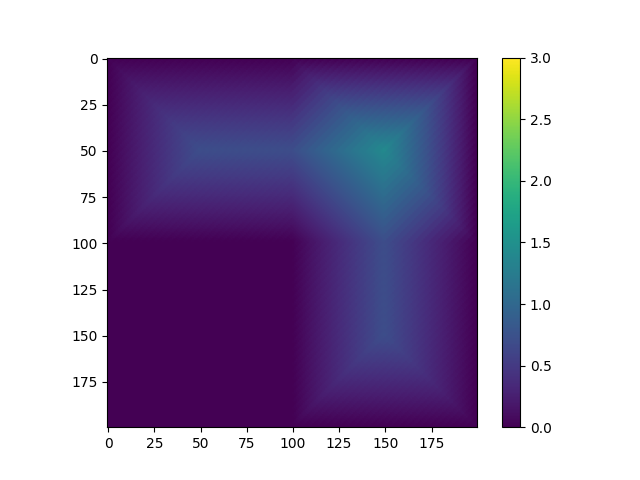

In [44]:
plt.figure()
plt.imshow(np.flip(L.sum(axis=2), 0), vmin=0., vmax=3.)
plt.colorbar()
plt.show()

Simplicial complex 2.

In [45]:
#  0
#
#
#        1

In [46]:
simplextree = gd.SimplexTree()
simplextree.insert([0])
simplextree.insert([1])
F1 = np.array([0,1])[:,np.newaxis]
F2 = np.array([1,0])[:,np.newaxis]
filters = np.hstack([F1,F2])

Show decomposition.

<IPython.core.display.Javascript object>


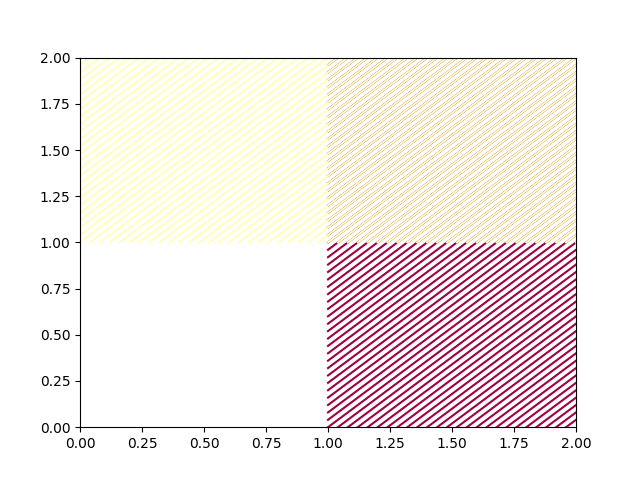

In [47]:
D, A, B, _ = sublevelsets_multipersistence(
    'vineyards', simplextree, filters, homology=0, num_lines=100, essential=True, 
    bnds_filt=[0,2,0,2], epsilon=1e-10, visu=True, plot_per_bar=False, bnds_visu=None)

In [48]:
delta = np.abs(A[0,0] - A[1,0]) if A[0,0] != A[1,0] else np.abs(A[2,2] - A[1,2])
I = multipersistence_image(D, B, resolution=[200,200], bandwidth=.1, power=0.)
L = multipersistence_landscape(D, B, delta, resolution=[200,200], k=3)

Show Multiparameter Persistence Image.

<IPython.core.display.Javascript object>


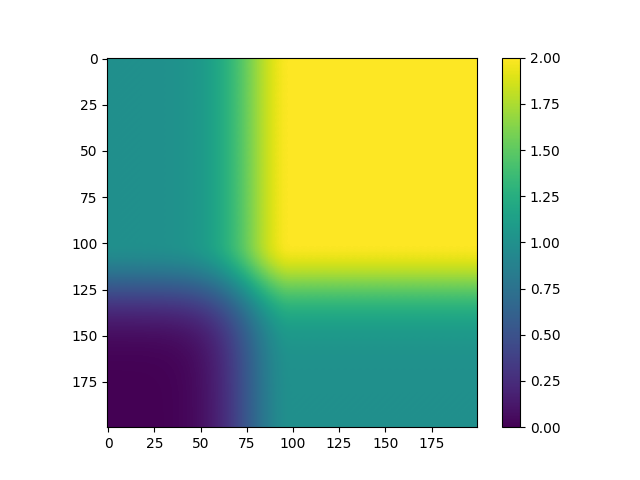

In [49]:
plt.figure()
plt.imshow(np.flip(I, 0), vmin=0., vmax=2.)
plt.colorbar()
plt.show()

Show Multiparameter Persistence Landscape.

<IPython.core.display.Javascript object>


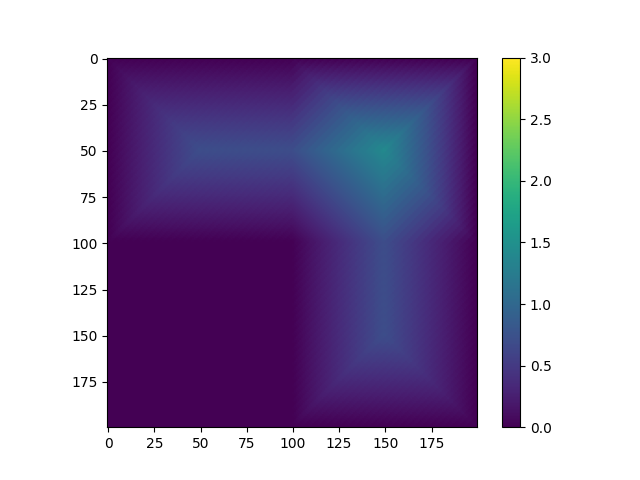

In [50]:
plt.figure()
plt.imshow(np.flip(L.sum(axis=2), 0), vmin=0., vmax=3.)
plt.colorbar()
plt.show()

# Indecomposable persistence module

In [51]:
#         5
#       / | \
#      /  4  \
#     / / | \ \
#   1 --- 2 --- 3
#     \   |   /
#      \  |  /
#       \ | /
#         0     

Show (fake) decomposition.

<IPython.core.display.Javascript object>


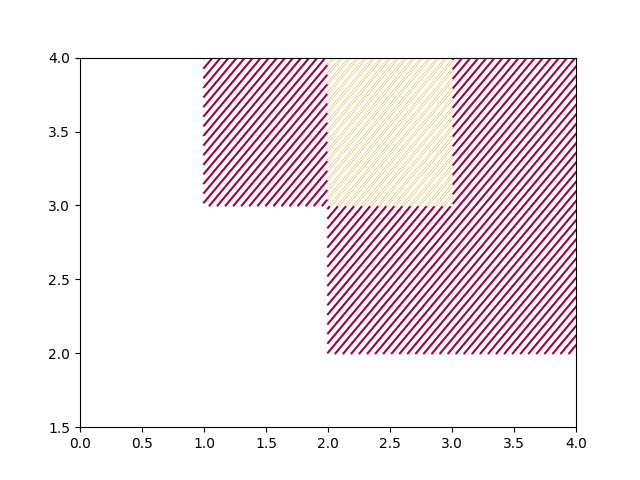

In [52]:
D, A, B, _ = sublevelsets_multipersistence(
    "vineyards", "./ex/indec_cpx.txt", "./ex/indec_flt.txt", homology=1, num_lines=100, essential=True, 
    corner="dg", bnds_filt=[0,4,1.5,4], epsilon=1e-10, visu=True, plot_per_bar=False, bnds_visu=None)

In [53]:
delta = np.abs(A[0,0] - A[1,0]) if A[0,0] != A[1,0] else np.abs(A[2,2] - A[1,2])
I = multipersistence_image(D, np.array(B), resolution=[200,200], bandwidth=.1)
L = multipersistence_landscape(D, B, delta, resolution=[200,200], k=3)

Show Multiparameter Persistence Image.

<IPython.core.display.Javascript object>


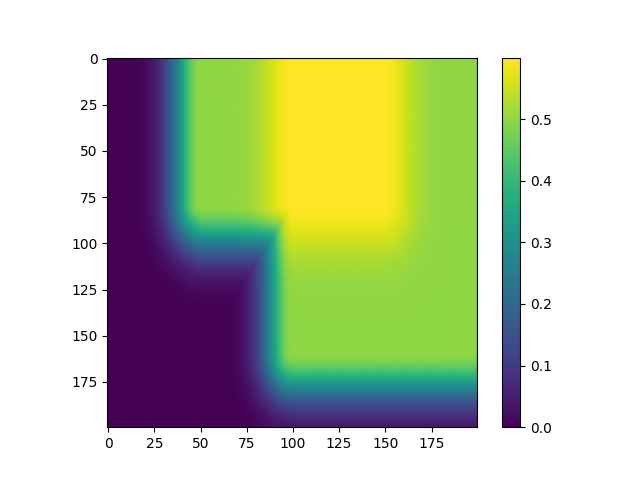

In [54]:
plt.figure()
plt.imshow(np.flip(I, 0))
plt.colorbar()
plt.show()

Show Multiparameter Persistence Landscape.

<IPython.core.display.Javascript object>


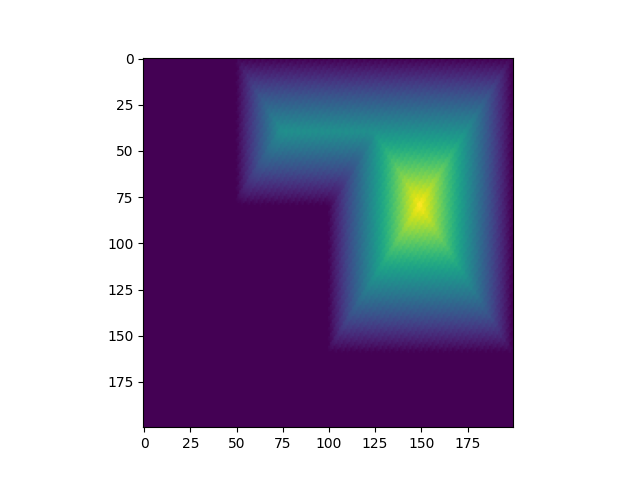

<IPython.core.display.Javascript object>


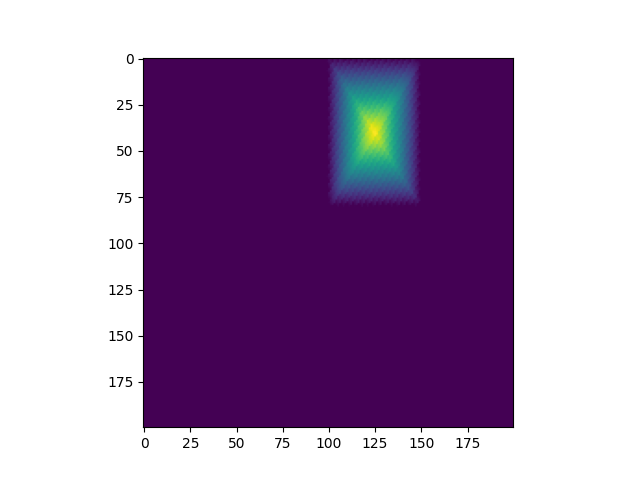

<IPython.core.display.Javascript object>


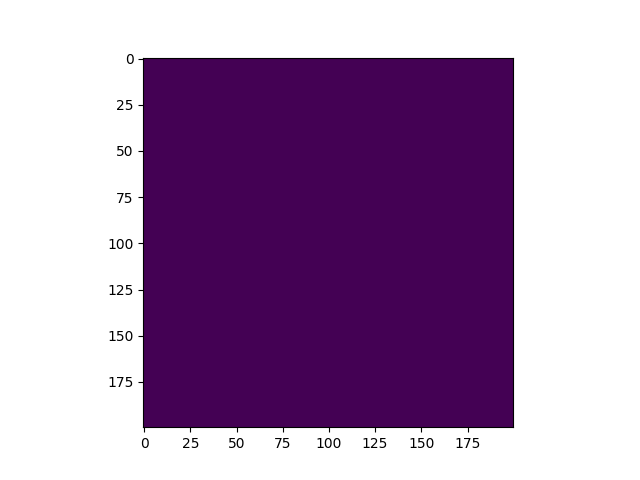

In [55]:
plt.figure()
plt.imshow(np.flip(L[:,:,0], 0))
plt.show()
plt.figure()
plt.imshow(np.flip(L[:,:,1], 0))
plt.show()
plt.figure()
plt.imshow(np.flip(L[:,:,2], 0))
plt.show()

# Extended sublevelsets and interlevelsets

In [56]:
#      5
#      |
#      4   7
#     / \ /
#    2   3
#   / \ /
#  6   1
#      |
#      0

<IPython.core.display.Javascript object>


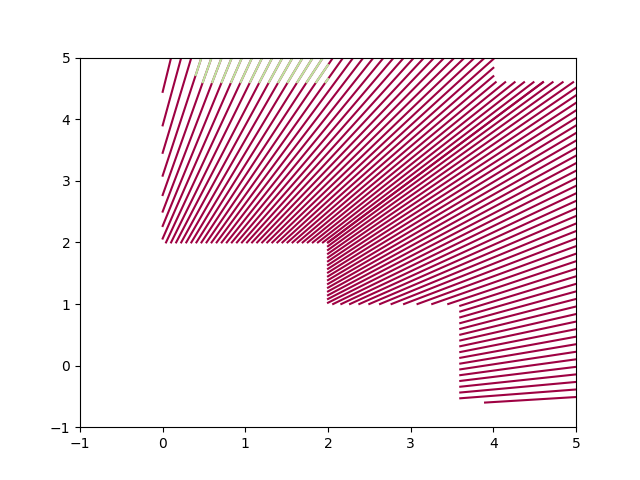

<IPython.core.display.Javascript object>


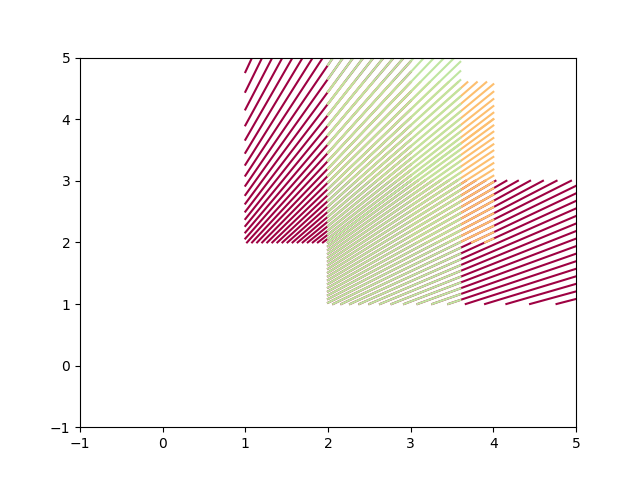

In [57]:
D0, A, B, _ = sublevelsets_multipersistence(
    "vineyards", "./ex/graph_cpx.txt", "./ex/graph_flt.txt", homology=0, num_lines=100, extended=True,
    corner="ll", bnds_filt=[-1,5,-1,5], epsilon=1e-10, visu=True, plot_per_bar=False, bnds_visu=None)
D1, A, B, _ = sublevelsets_multipersistence(
    "vineyards", "./ex/graph_cpx.txt", "./ex/graph_flt.txt", homology=1, num_lines=100, extended=True,
    corner="ll", bnds_filt=[-1,5,-1,5], epsilon=1e-10, visu=True, plot_per_bar=False, bnds_visu=None)
D = D0 + D1

In [58]:
f1 = np.loadtxt("./ex/graph_flt.txt", dtype=float)[:,0]

<IPython.core.display.Javascript object>


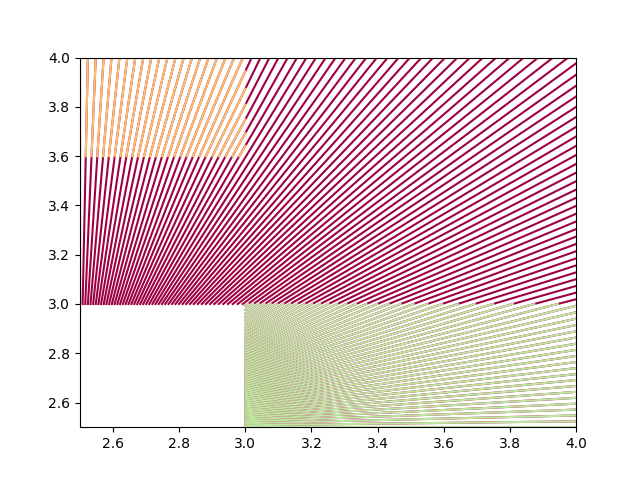

In [59]:
D0, A, B, _ = interlevelsets_multipersistence(
    "vineyards", "./ex/graph_cpx.txt", f1, homology=0, num_lines=100, basepoint=2.5, essential=True,
    bnds_filt=[-1,5], epsilon=1e-10, visu=True, plot_per_bar=False, bnds_visu=None)